**Install & Import Libraries**

In [1]:
# !pip install pandas tabula-py PyPDF2
# !java -version
import pandas as pd
import os
import tabula
from tabula.io import read_pdf
from PyPDF2 import PdfReader
import warnings
warnings.filterwarnings("ignore")

**Set the Directory**

In [2]:
os.chdir("../2.DOCUMENT")
PDF = "Alborz-1395.pdf"

**Define Specific Areas in Tabula**

Tabula uses a point-based coordinate system:
- **Unit:** points  
  *(1 point = 1/72 inch)*

- **Format:** top-left corner of the PDF page

<p align="center">

`[top, left, bottom, right]`

</p>

In [3]:
col_area_1 = {
    "Year": [30, 123, 62, 170],
    "District_Name": [66, 170, 82, 239],
    "County_Name": [66, 265, 82, 367],
    "Province_Name": [66, 412, 82, 532],
    "Major_Type": [100, 530, 114, 564]
}

col_area_2 = {
    "Year": [30, 90, 72, 161],
    "District_Name": [75, 164, 94, 239],
    "County_Name": [75, 265, 94, 367],
    "Province_Name": [75, 412, 94, 532]
}

The following image shows an example of how I extract specific areas from the pages.

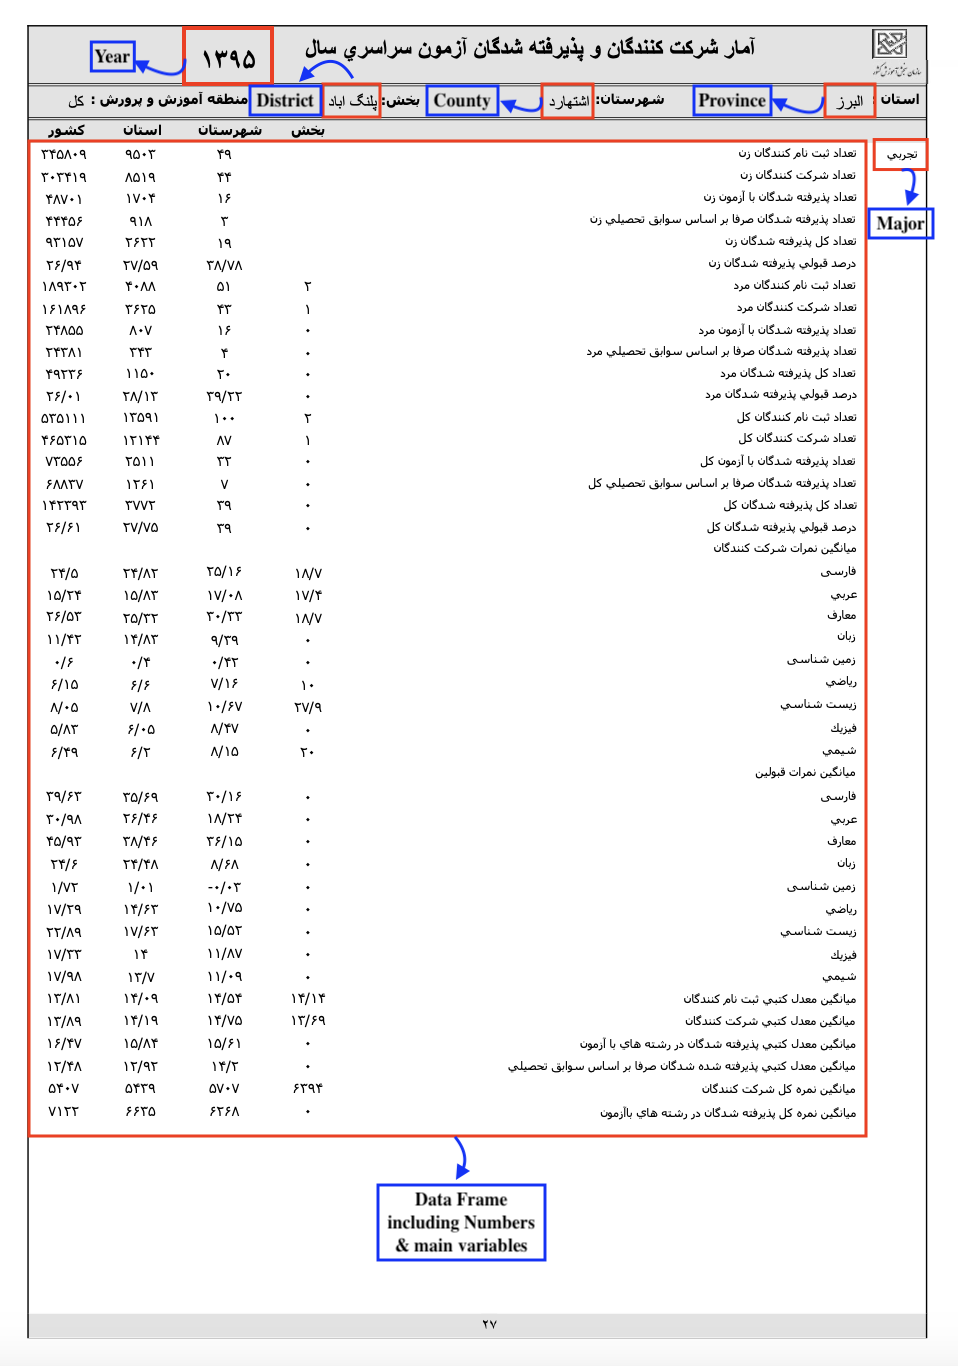

**Create an empty DataFrame**

In [4]:
main_df = pd.DataFrame()

**Define an assign function:**

- Get a list of predefined areas and page numbers to extract values.
- If no table is found, the function will return `None`.

In [5]:
def assign_column(area, page):
    data = tabula.read_pdf(
        PDF, stream=True, guess=False, area=area,
        pandas_options={'header': None}, pages=page)
    
    if len(data) == 0 or data[0].empty:
        return None
    
    return str(data[0].iloc[0, 0]).strip()

**Main For Loop:**

- Iterate through each page of the PDF until you reach the last page.
- Read a section of the table from the current page.
- Check for the presence of `"آزمايشي"` in column 5 to determine if the area needs to be modified.
- Use the previously defined function to extract additional columns.
- Append the data to the main dataframe.

In [6]:
total_page = len(PdfReader(PDF).pages)

for page in range(27, total_page + 1):
    num_df = tabula.read_pdf(PDF,
                             stream=True, area=[115, 30, 792, 550],
                            pandas_options={'header': None}, pages=page)[0]
    
    col_info = col_area_1
    
    if "آزمايشي" in num_df.iloc[:, 4].to_string():

        col_info = col_area_2
        
        num_df = tabula.read_pdf(PDF,
                                stream=True, area = [115, 30, 792, 550],
                                          pandas_options={'header': None}, pages=page)[0]
        
        num_df['Major_Type'] = " "
    else: 
        num_df = tabula.read_pdf(PDF,
                                stream=True, area = [99, 30, 792, 528],
                                          pandas_options={'header': None}, pages=page)[0]
    
    num_df.rename(columns={
                    num_df.columns[0]: "Country",
                    num_df.columns[1]: "Province",
                    num_df.columns[2]: "County",
                    num_df.columns[3]: "District",
                    num_df.columns[4]: "Variables"
                }, inplace=True)

    for col_name, area in col_info.items():
            num_df[col_name] = assign_column(area, page)
    
    print("Now Work on Page:", page)
    

    main_df = pd.concat([main_df, num_df], ignore_index=True)

print("Finished Successfully")

Now Work on Page: 27
Now Work on Page: 28
Now Work on Page: 29
Now Work on Page: 30
Now Work on Page: 31
Now Work on Page: 32
Now Work on Page: 33
Now Work on Page: 34
Now Work on Page: 35
Now Work on Page: 36
Now Work on Page: 37
Now Work on Page: 38
Now Work on Page: 39
Now Work on Page: 40
Now Work on Page: 41
Now Work on Page: 42
Now Work on Page: 43
Now Work on Page: 44
Now Work on Page: 45
Now Work on Page: 46
Now Work on Page: 47
Now Work on Page: 48
Now Work on Page: 49
Now Work on Page: 50
Now Work on Page: 51
Now Work on Page: 52
Now Work on Page: 53
Now Work on Page: 54
Now Work on Page: 55
Now Work on Page: 56
Now Work on Page: 57
Now Work on Page: 58
Now Work on Page: 59
Now Work on Page: 60
Now Work on Page: 61
Now Work on Page: 62
Now Work on Page: 63
Now Work on Page: 64
Now Work on Page: 65
Now Work on Page: 66
Now Work on Page: 67
Now Work on Page: 68
Now Work on Page: 69
Now Work on Page: 70
Now Work on Page: 71
Now Work on Page: 72
Now Work on Page: 73
Now Work on P

**Test**

In [7]:
main_df.head()

,Country,Province,County,District,Variables,Year,District_Name,County_Name,Province_Name,Major_Type
0,٣۴۵٨٠٩,٩۵٠٣,۴٩,NaN,تعداد ثبت نام کنندگان زن,1395,پلنگ اباد,اشتھارد,البرز,تجربي
1,٣٠٣۴١٩,٨۵١٩,۴۴,NaN,تعداد شرکت کنندگان زن,1395,پلنگ اباد,اشتھارد,البرز,تجربي
2,۴٨٧٠١,١٧٠۴,١۶,NaN,تعداد پذيرفته شدگان با آزمون زن,1395,پلنگ اباد,اشتھارد,البرز,تجربي
3,۴۴۴۵۶,٩١٨,٣,NaN,تعداد پذيرفته شدگان صرفا بر اساس سوابق تحصیلي زن,1395,پلنگ اباد,اشتھارد,البرز,تجربي
4,٩٣١۵٧,٢۶٢٢,١٩,NaN,تعداد کل پذيرفته شدگان زن,1395,پلنگ اباد,اشتھارد,البرز,تجربي


**Cleaning**

- Fill in the empty cells with zeros in the first 4 columns.

In [8]:
main_df.iloc[:, 0:4] = main_df.iloc[:, 0:4].replace({'': '0', pd.NA: '0'})

Save this file as a CSV in the **"OUTPUT"** folder.

In [9]:
main_df.to_csv(f"../3.OUTPUT/{PDF.replace('.pdf', '')}.csv", index=False, encoding='utf-8-sig')